# Importation des librairies

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Chargement des données

In [11]:
Suicide = pd.read_csv('./input/master.csv')

In [12]:
Suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [13]:
Suicide.shape

(27820, 12)

# Exploration et Traitement des données

In [14]:
#Data inspection and cleaning
Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


* La colonne "HDI for year" a 2/3 de ses données manquantes. Malheureusement, nous devrons supprimer cette colonne.

In [15]:
# Suicide.drop(['country-year','HDI for year'],axis=1,inplace=True)
Suicide.drop(['HDI for year'],axis=1,inplace=True)

Renommer les colonnes pour plus de clarté

In [16]:
Suicide.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

Convertir les colonnes en type numérique

In [17]:
Suicide["gdp_for_year"] = Suicide["gdp_for_year"].str.replace(",","").astype(np.int64)

In [18]:
Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  int64  
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.3+ MB


In [19]:
Suicide.nunique()

country             101
year                 32
sex                   2
age                   6
suicides_no        2084
population        25564
suicides_pop       5298
country-year       2321
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

# Visualisation des données

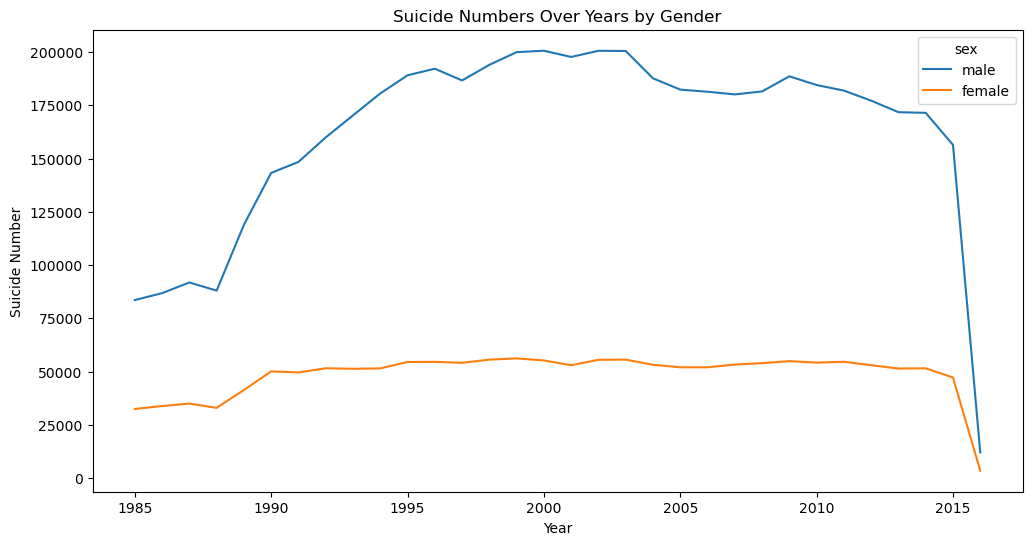

In [69]:
#Time Series Analysis: Suicide Numbers Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides_no', data=Suicide, estimator='sum', ci=None, hue='sex')
plt.title('Suicide Numbers Over Years by Gender')
plt.xlabel('Year')
plt.ylabel('Suicide Number')
plt.show()

Les observations du graphique ci-dessus indiquent que le taux de suicide a augmenté rapidement à partir de l'année 1990, et le taux de suicide a considérablement diminué en 2016. Le jeu de données a été collecté au début de 2016. Ainsi, tous les cas de suicide de 2016 ne sont pas enregistrés dans le jeu de données.

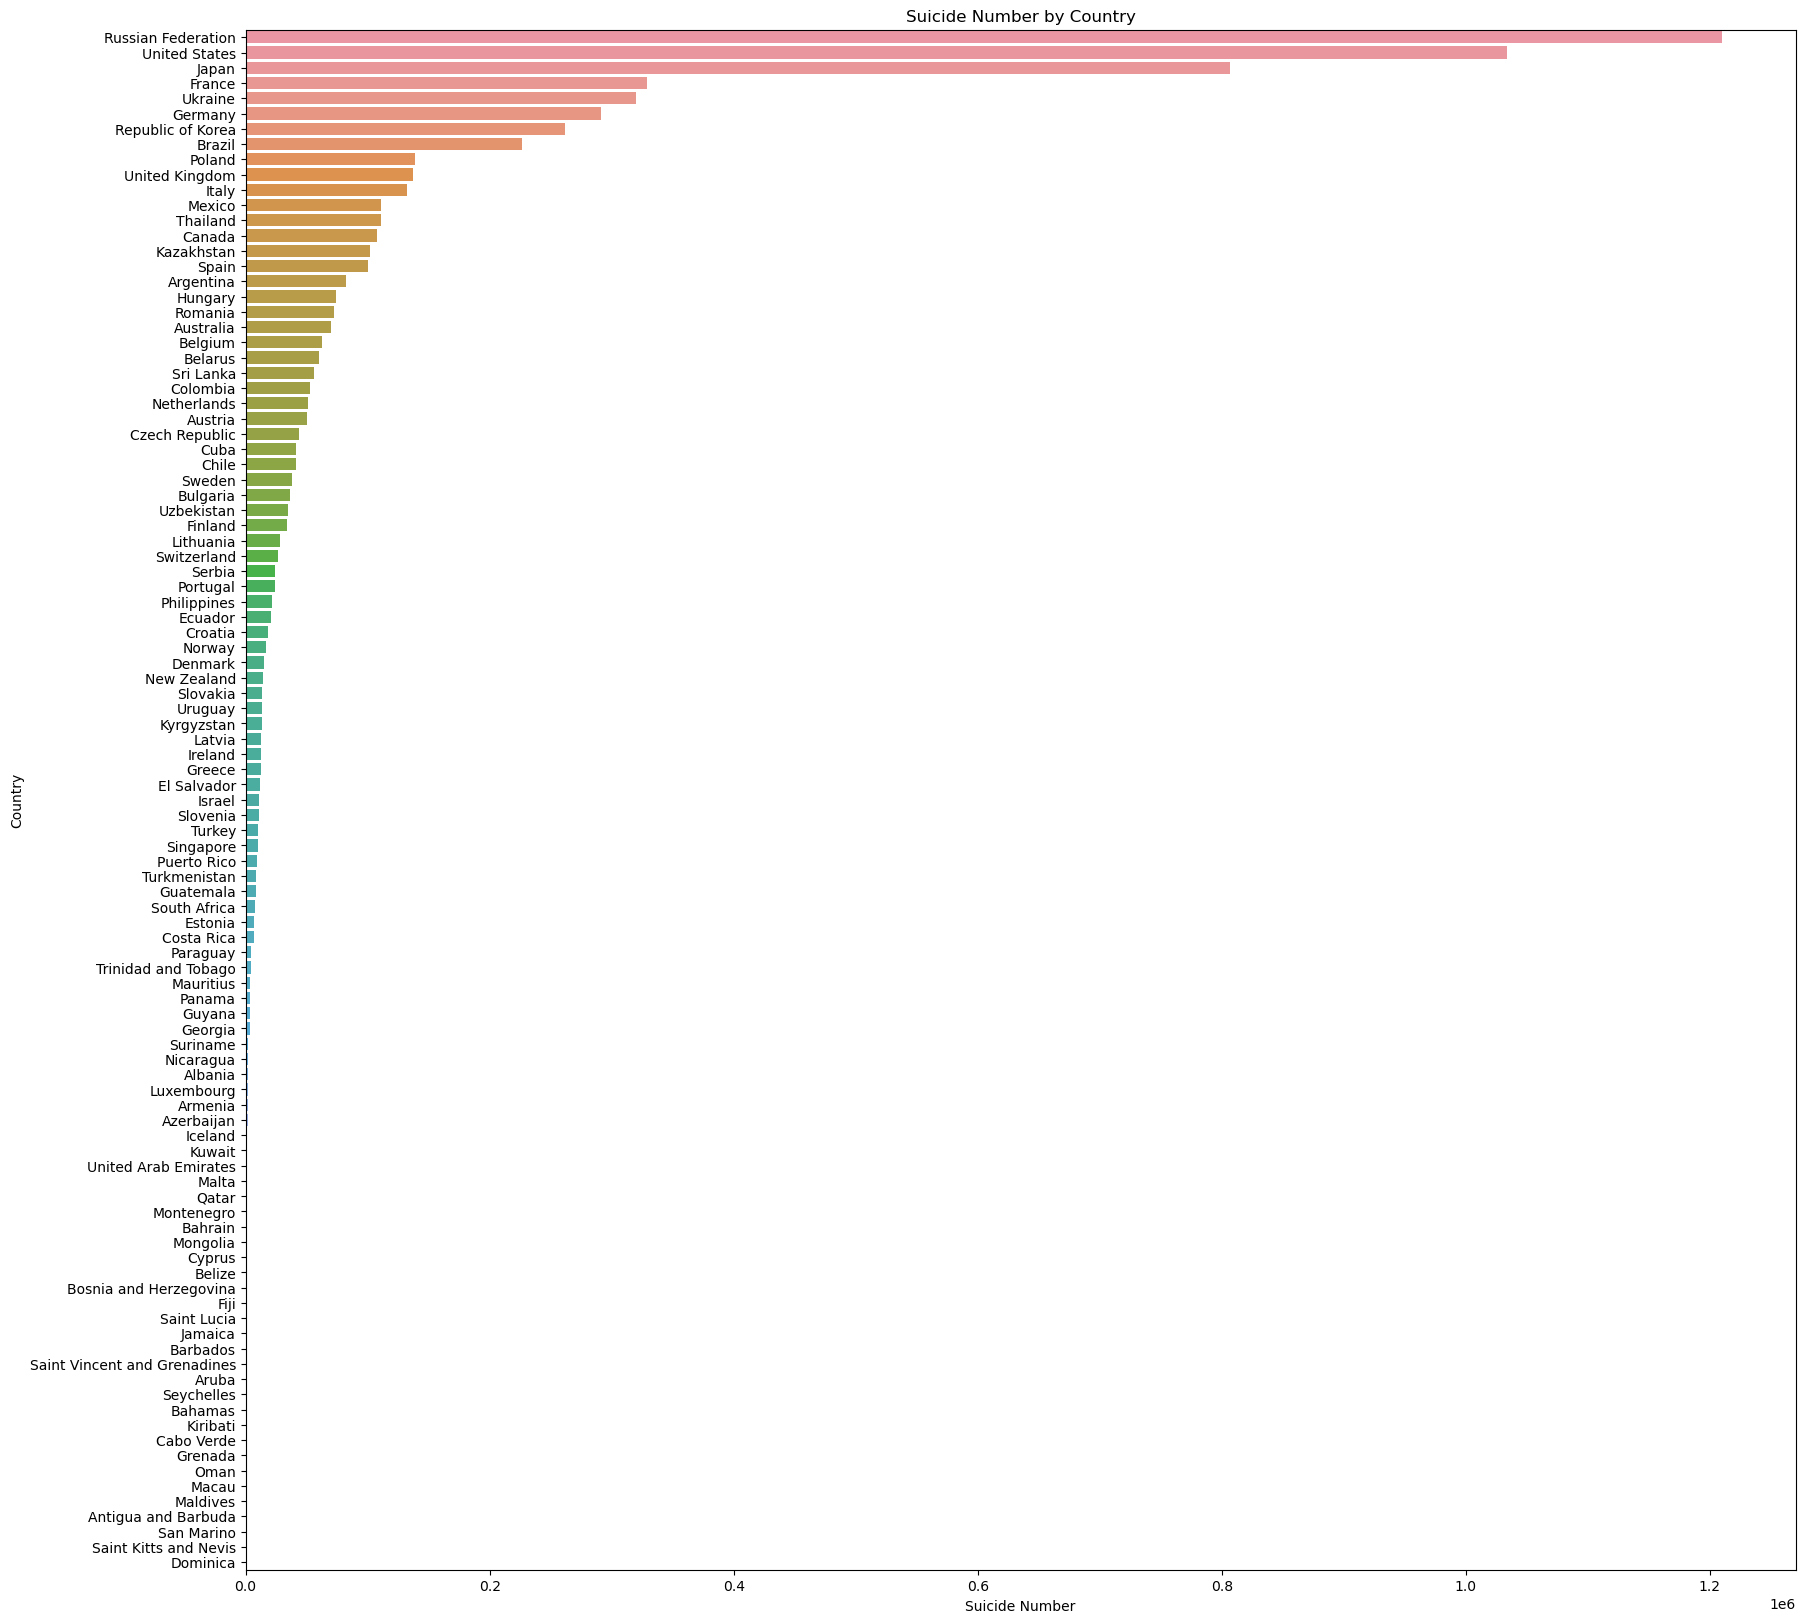

In [68]:
#Suicide Rates by Country

# Summarize the data by country and reset the index
df_country_sum = Suicide.groupby('country').sum().reset_index()

# Sort the DataFrame by 'suicides_no' in descending order
df_country_sum_sorted = df_country_sum.sort_values(by='suicides_no', ascending=False)

# Create the bar plot
plt.figure(figsize=(20, 20))
sns.barplot(x='suicides_no', y='country', data=df_country_sum_sorted)
plt.title('Suicide Number by Country')
plt.xlabel('Suicide Number')
plt.ylabel('Country')
plt.show()

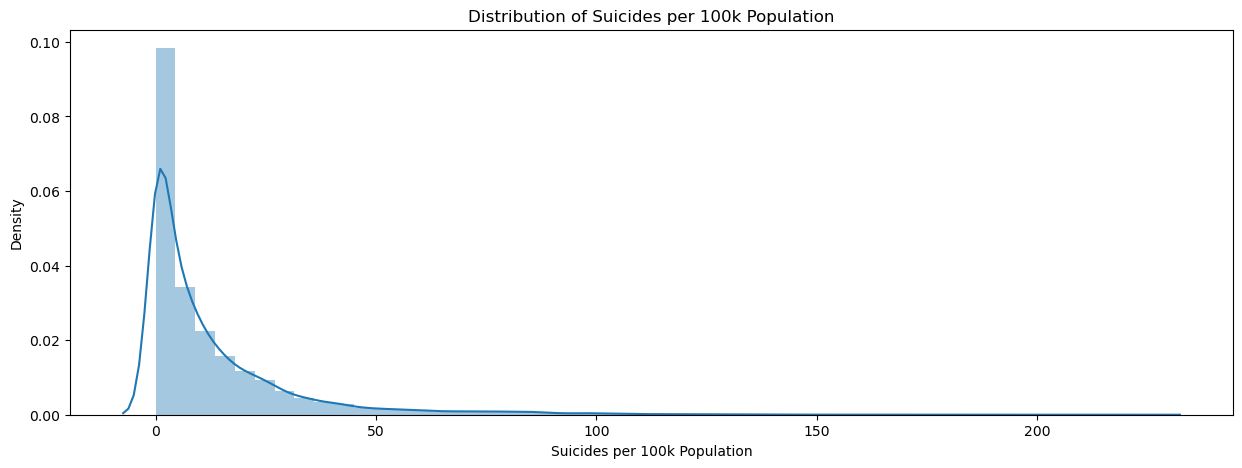

In [22]:
#EDA
plt.figure(figsize=(15,5))
sns.distplot(Suicide['suicides_pop'],hist=True)
plt.title('Distribution of Suicides per 100k Population')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Density')
plt.show()

Comme nous pouvons le constater, la variable cible ne suit pas une distribution normale. Par conséquent, nous devrons normaliser la distribution avant d'utiliser un modèle linéaire dessus.

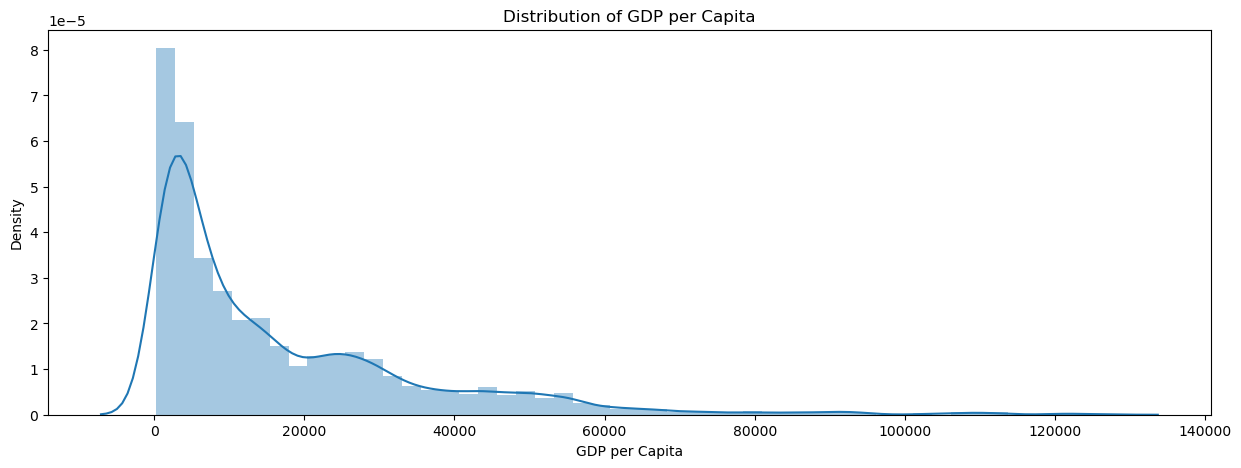

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(Suicide['gdp_per_capita'],hist=True)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.show()

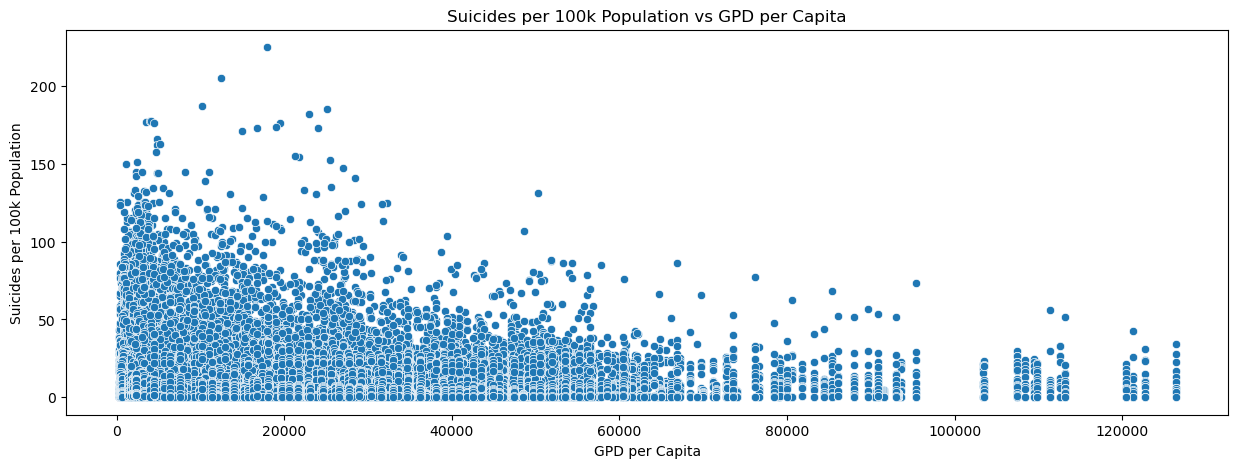

In [24]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=Suicide['gdp_per_capita'],y=Suicide['suicides_pop'])
plt.title('Suicides per 100k Population vs GPD per Capita')
plt.xlabel('GPD per Capita')
plt.ylabel('Suicides per 100k Population')
plt.show()

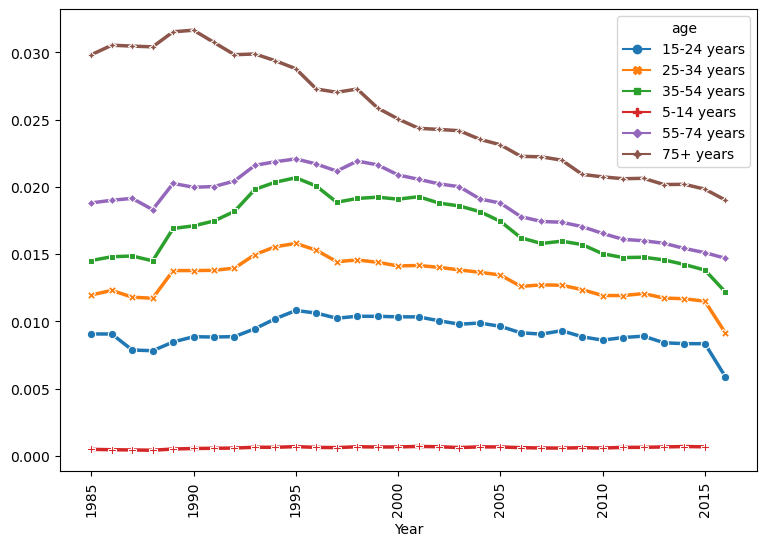

In [25]:
Suicide_age = Suicide.groupby(["year", "age"])["suicides_no", "population"].sum()
Suicide_reset = Suicide_age.copy().reset_index()

plt.figure(figsize=(9, 6))
sns.lineplot(x="year", y=Suicide_reset.suicides_no * 100 / Suicide_reset.population, hue="age",
             data=Suicide_reset, linewidth=2.5, style="age", markers=True, dashes=False)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.show()

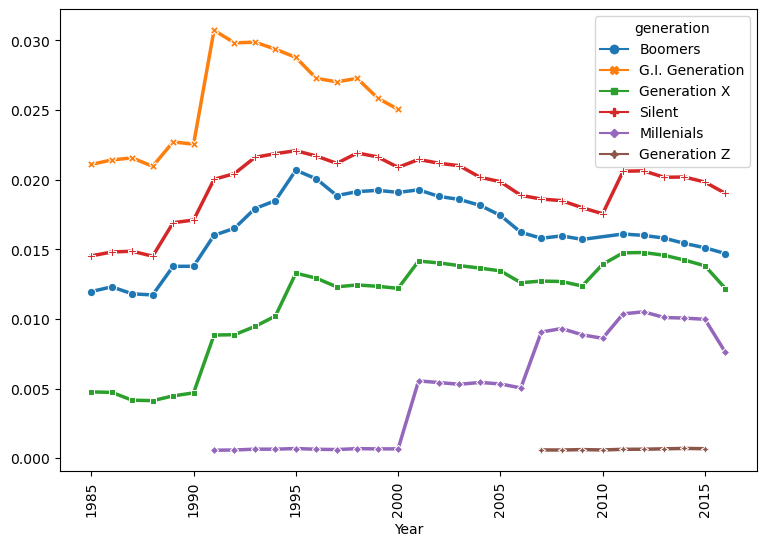

In [26]:
Suicide_generation = Suicide.groupby(["year", "generation"])["suicides_no", "population"].sum()
Suicide_generation_reset = Suicide_generation.copy().reset_index()

plt.figure(figsize=(9, 6))
sns.lineplot(x="year", y=Suicide_generation_reset.suicides_no * 100 / Suicide_generation_reset.population, hue="generation",
             data=Suicide_generation_reset, linewidth=2.5, style="generation", markers=True, dashes=False)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.show()

In [70]:
def suicide_box(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype not in [np.int64, np.int32, np.float64]):
            # Summarize the data by country and reset the index
            suicide_col_sum = Suicide.groupby(col).sum().reset_index()

            # Sort the DataFrame by 'suicides_no' in descending order
            suicide_col_sum_sorted = suicide_col_sum.sort_values(by='suicides_no', ascending=False)

            
            # Create the box plot
            plt.figure(figsize=(20, 10))
            sns.boxplot(x='suicides_no', data=suicide_col_sum_sorted)
            plt.title(f'Boxplot of Suicide Number by {col}')
            plt.show()

    return 'Done'


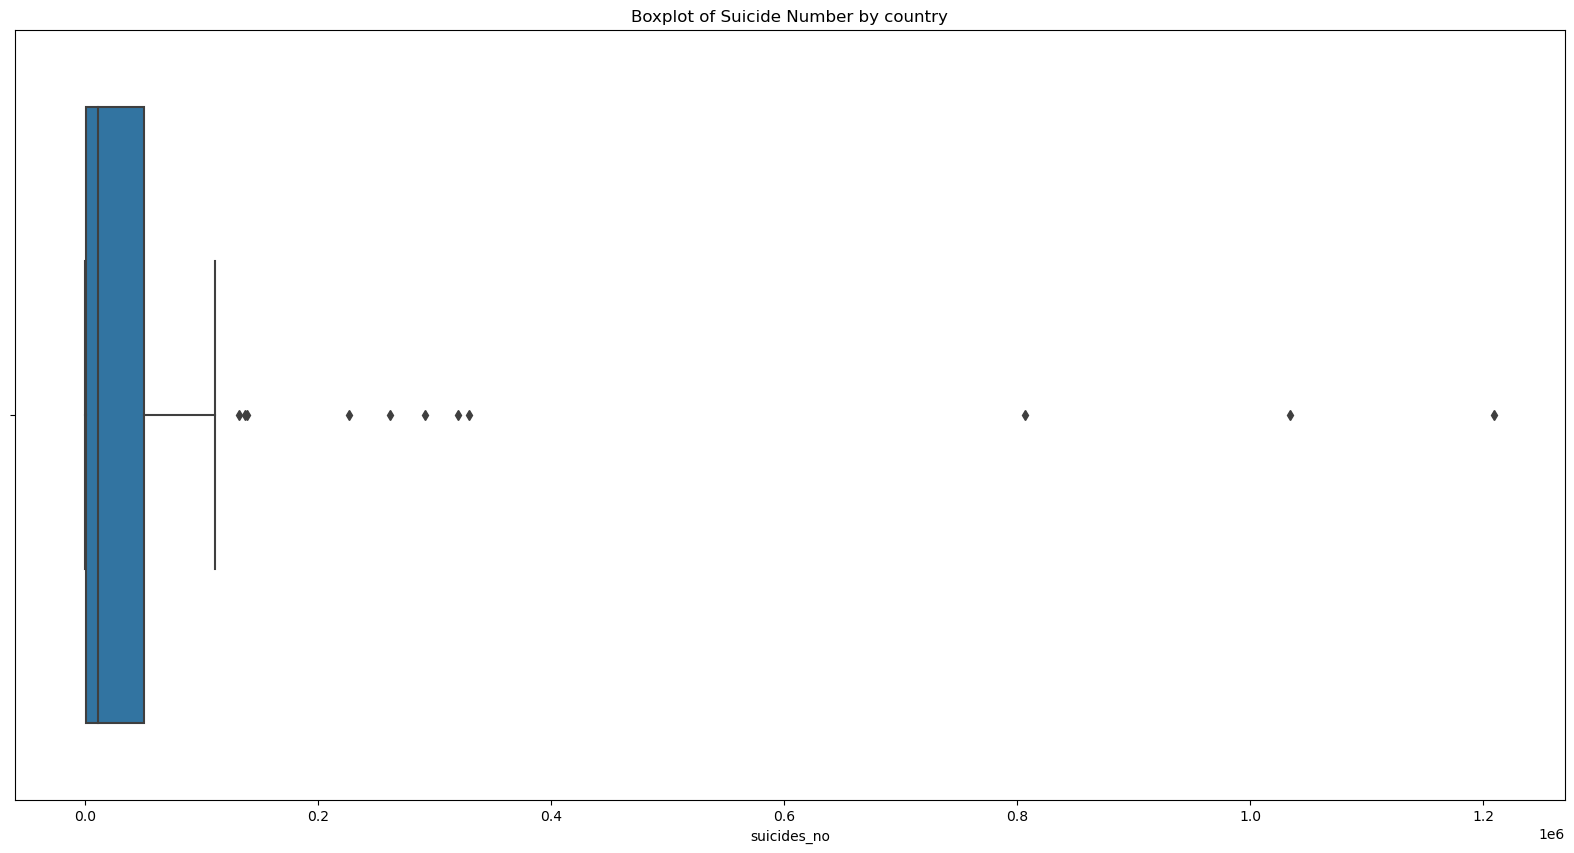

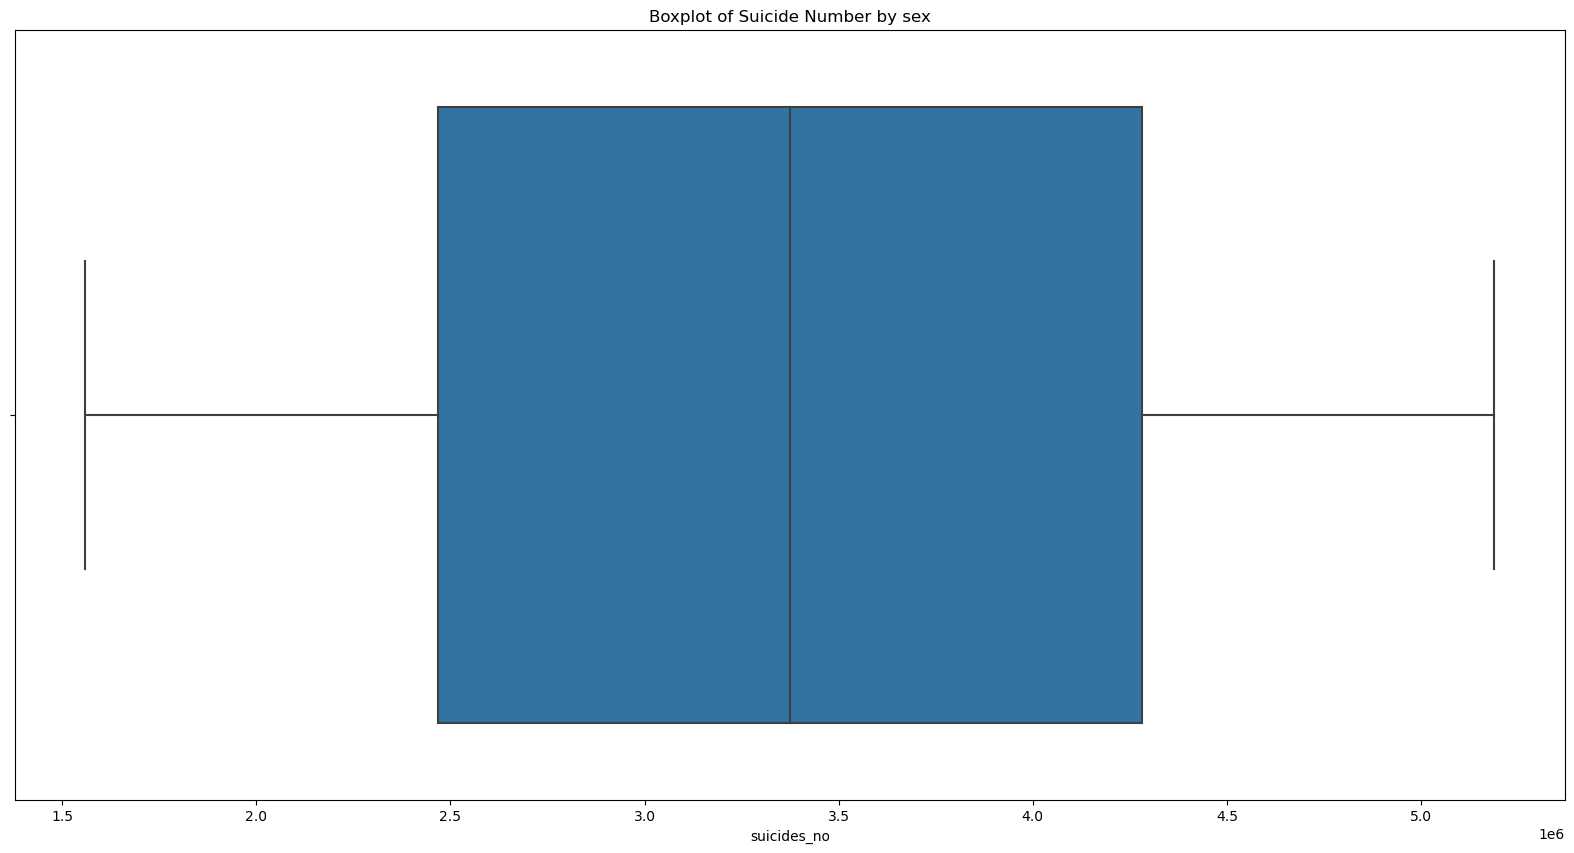

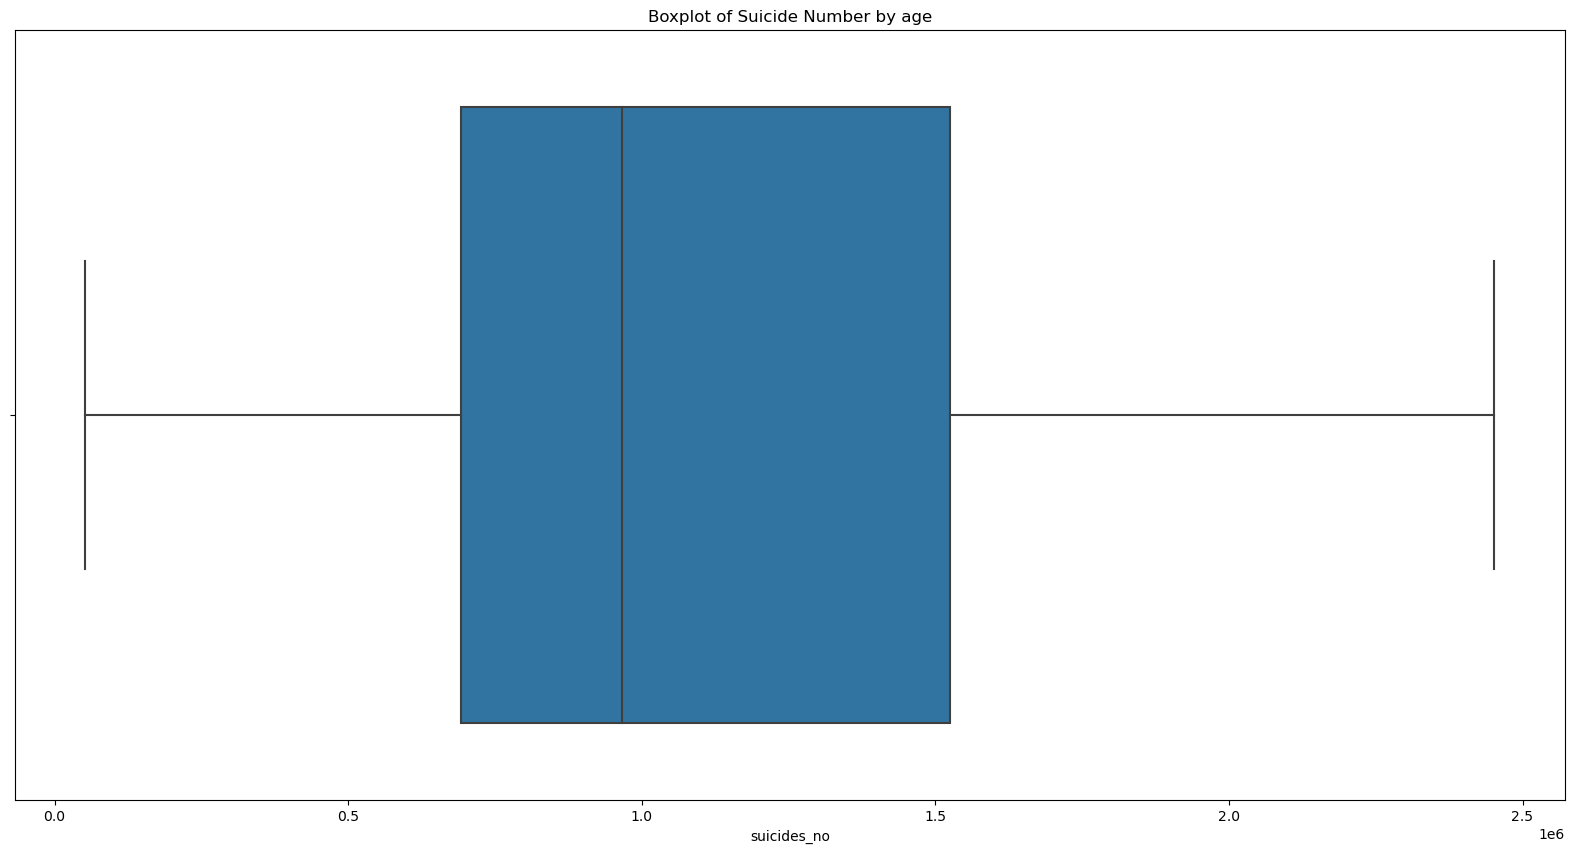

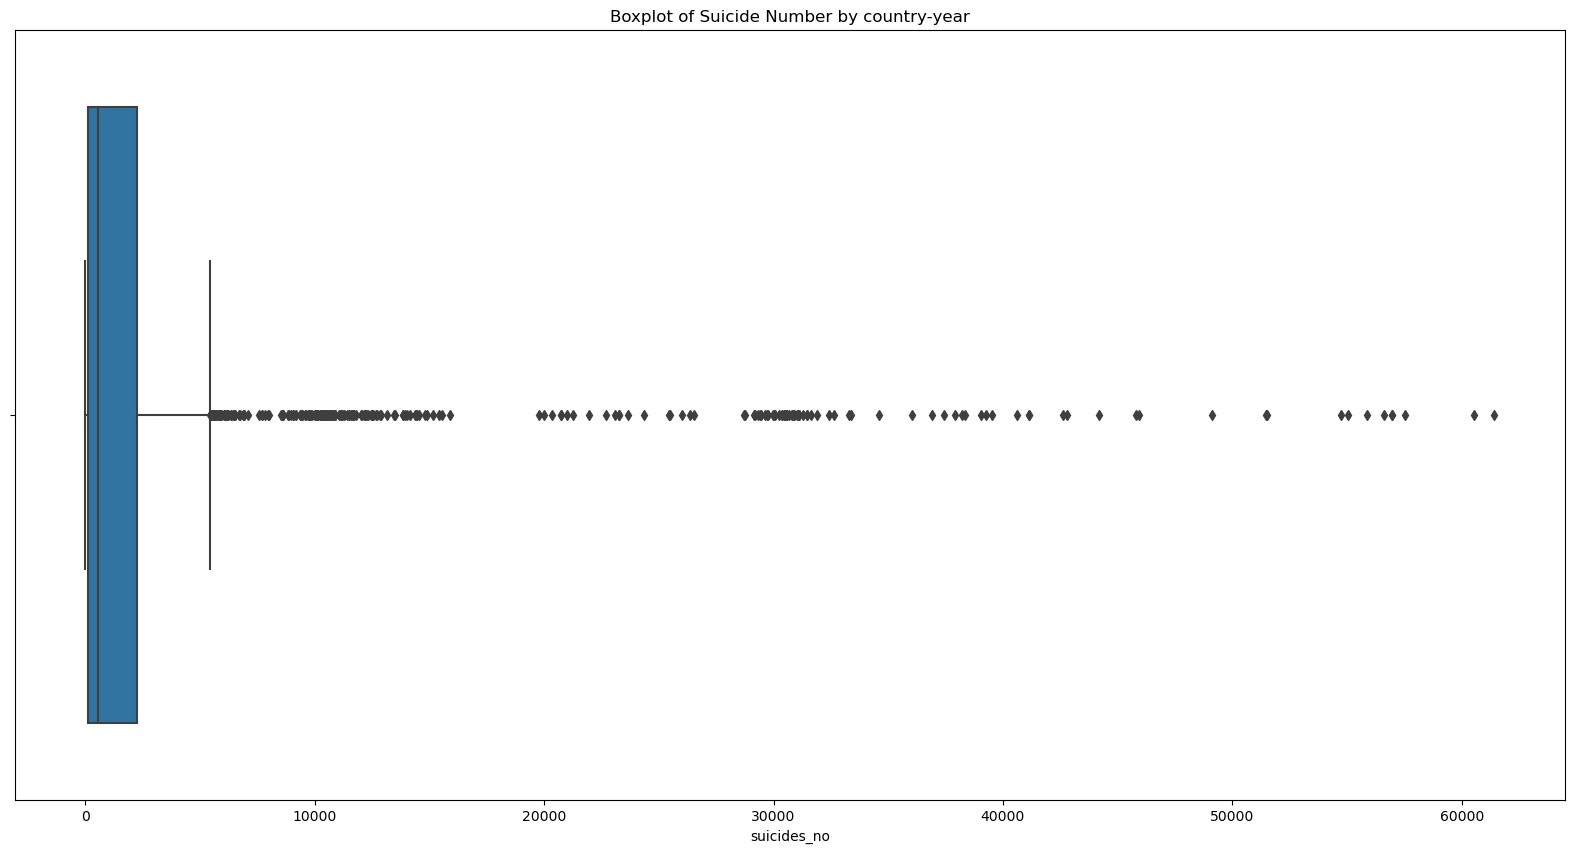

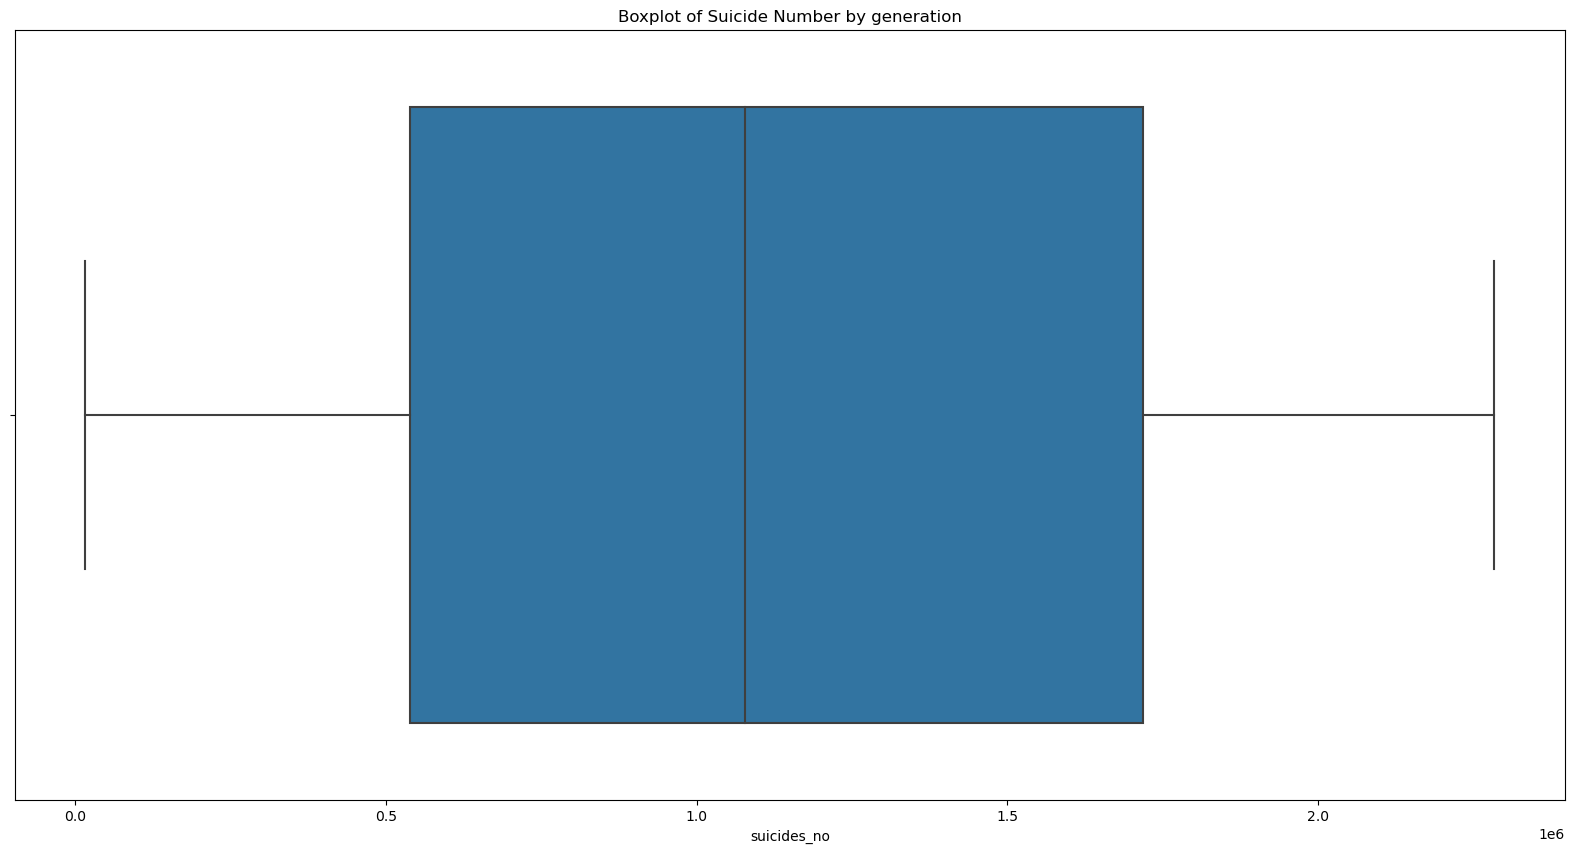

'Done'

In [71]:
suicide_box(Suicide)

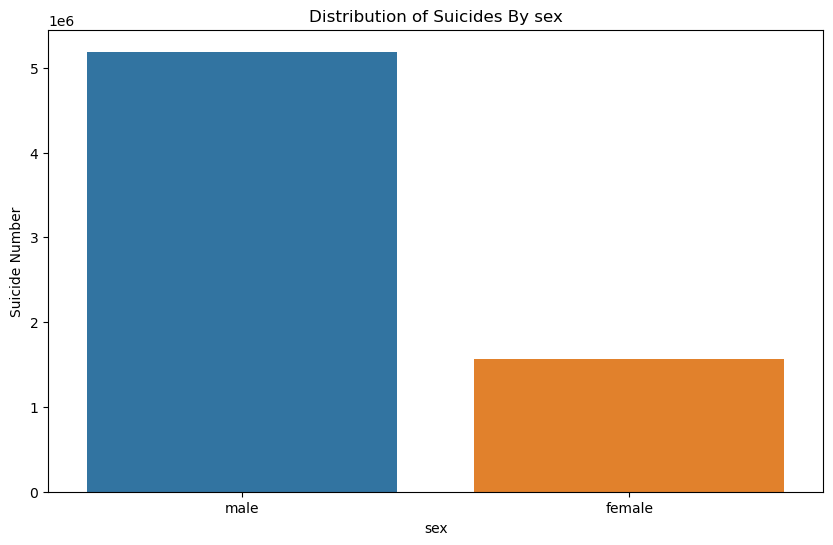

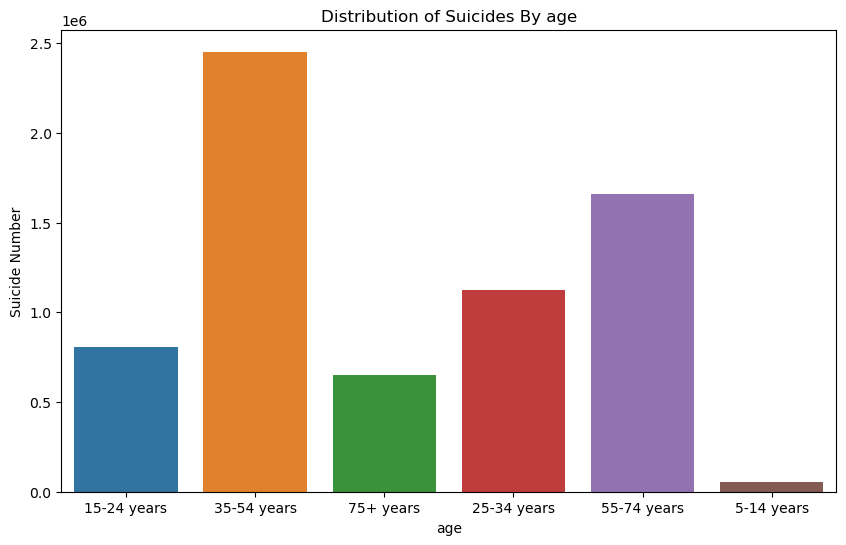

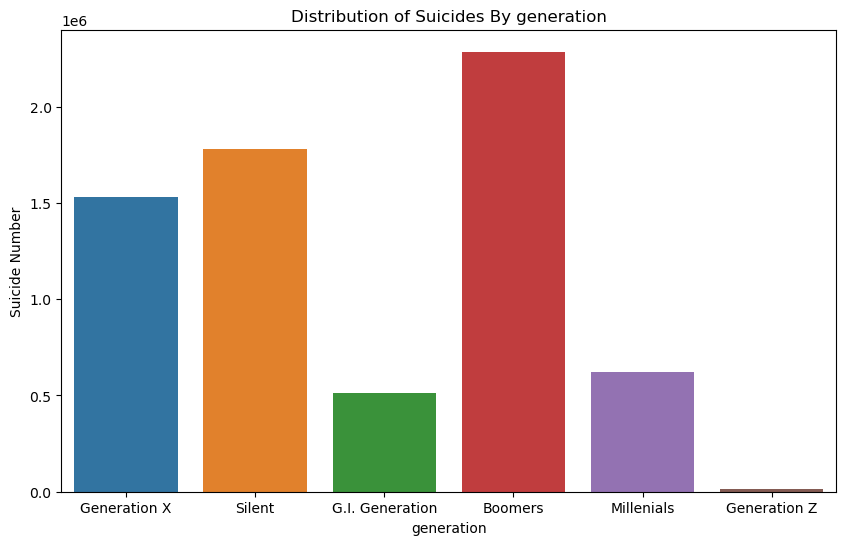

In [29]:
def suicide_bar(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype not in [np.int64, np.int32, np.float64] and col not in ['country', 'country-year']):
            plt.figure(figsize=(10, 6))
            sns.barplot(x=col, y='suicides_no', data=df, estimator='sum', ci=None)
            plt.title(f'Distribution of Suicides By {col}')
            plt.xlabel(col)
            plt.ylabel('Suicide Number')
            plt.show()

suicide_bar(Suicide)

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicides_no'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicides_pop'}>],
       [<Axes: title={'center': 'gdp_for_year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

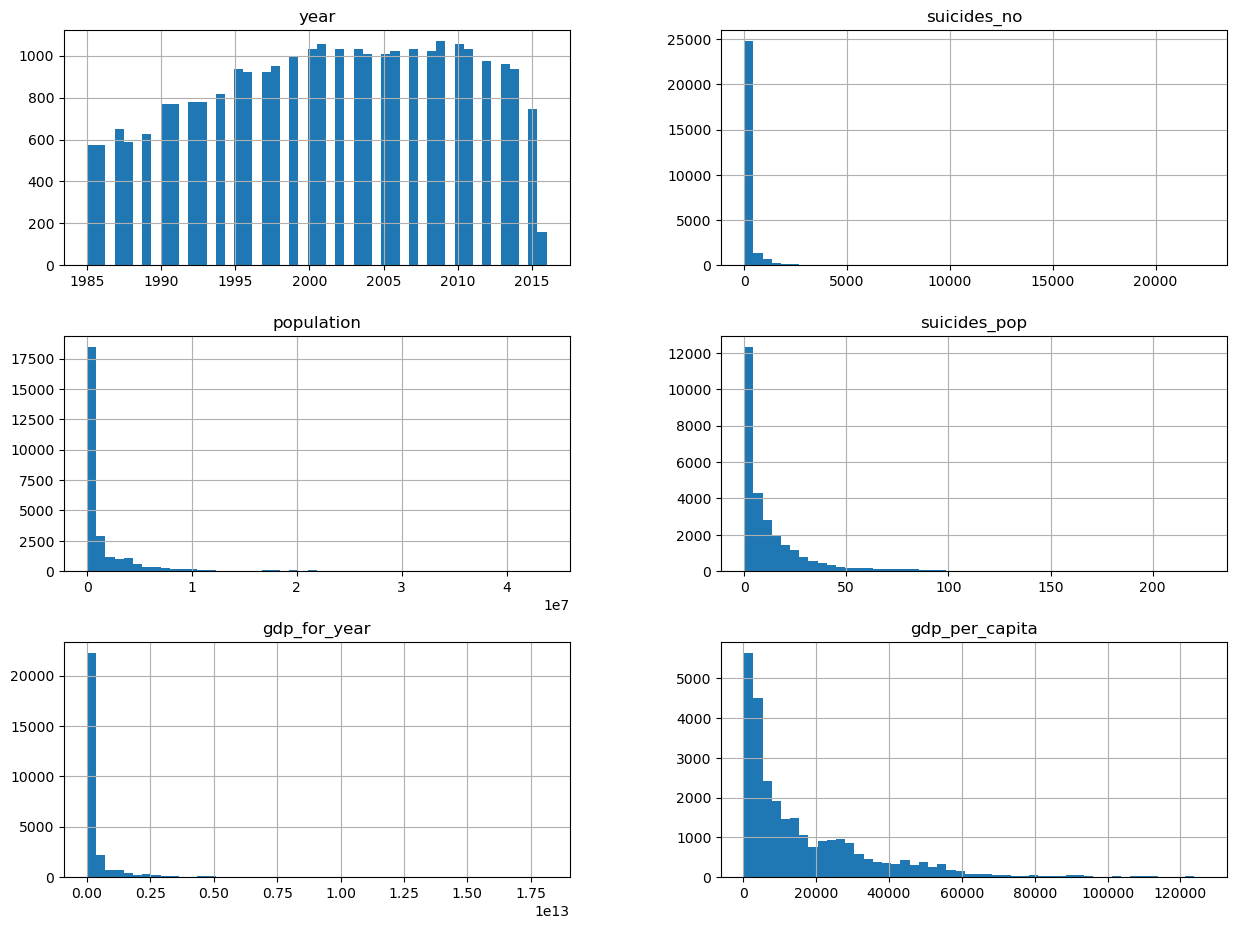

In [30]:
Suicide.hist(bins= 50, figsize=(15,11))

On crée une nouvelle colonne appelée "suicides_rate" dans le DataFrame "Suicide". Elle calcule le taux de suicide en divisant le nombre de suicides par la population, multiplié par 100 000, et arrondit le résultat à deux décimales.
Ce colonne sert à montrer la relation entre suicides_no, population et suicides_pop

In [31]:
Suicide['suicides_rate'] = (Suicide['suicides_no'] / Suicide['population'] * 100_000).round(2)

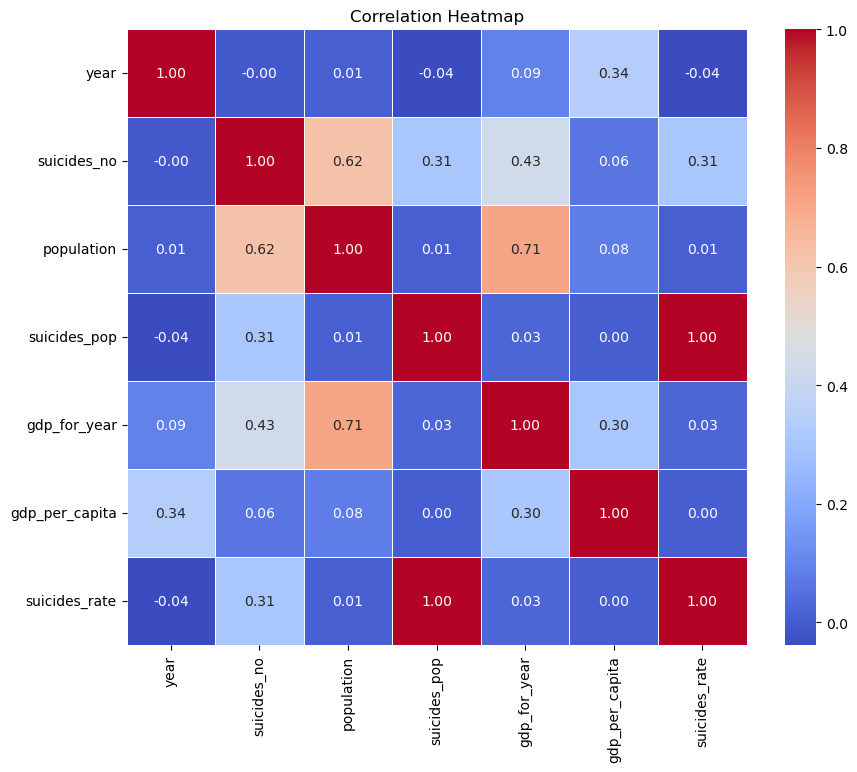

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=Suicide.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Donc, on remarque que suicides_rate et le même que suicides_pop, donc on doit les supprimer au niveau de l'entrainemnt de model

In [33]:
#Suicide.drop(['suicides_rate', 'suicides_pop'], axis=1, inplace=True)
Suicide.drop(['suicides_rate'], axis=1, inplace=True)

# Encodage des catégories

In [34]:
def codage_categorie(df):
    from sklearn import preprocessing
    df_copy = df.copy(True)
    le = preprocessing.LabelEncoder()
    for column_name in df_copy.columns:
        if df_copy[column_name].dtype == object:
            df_copy[column_name] = le.fit_transform(df_copy[column_name])
    return df_copy

data = codage_categorie(Suicide)
data.head()

country  year  sex  age  suicides_no  population  suicides_pop  \
0        0  1987    1    0           21      312900          6.71   
1        0  1987    1    2           16      308000          5.19   
2        0  1987    0    0           14      289700          4.83   
3        0  1987    1    5            1       21800          4.59   
4        0  1987    1    1            9      274300          3.28   

   country-year  gdp_for_year  gdp_per_capita  generation  
0             0    2156624900             796           2  
1             0    2156624900             796           5  
2             0    2156624900             796           2  
3             0    2156624900             796           1  
4             0    2156624900             796           0

In [35]:
#Scaling the numerical data columns with RobustScalar
numerical = Suicide.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

<Figure size 2000x1000 with 0 Axes>

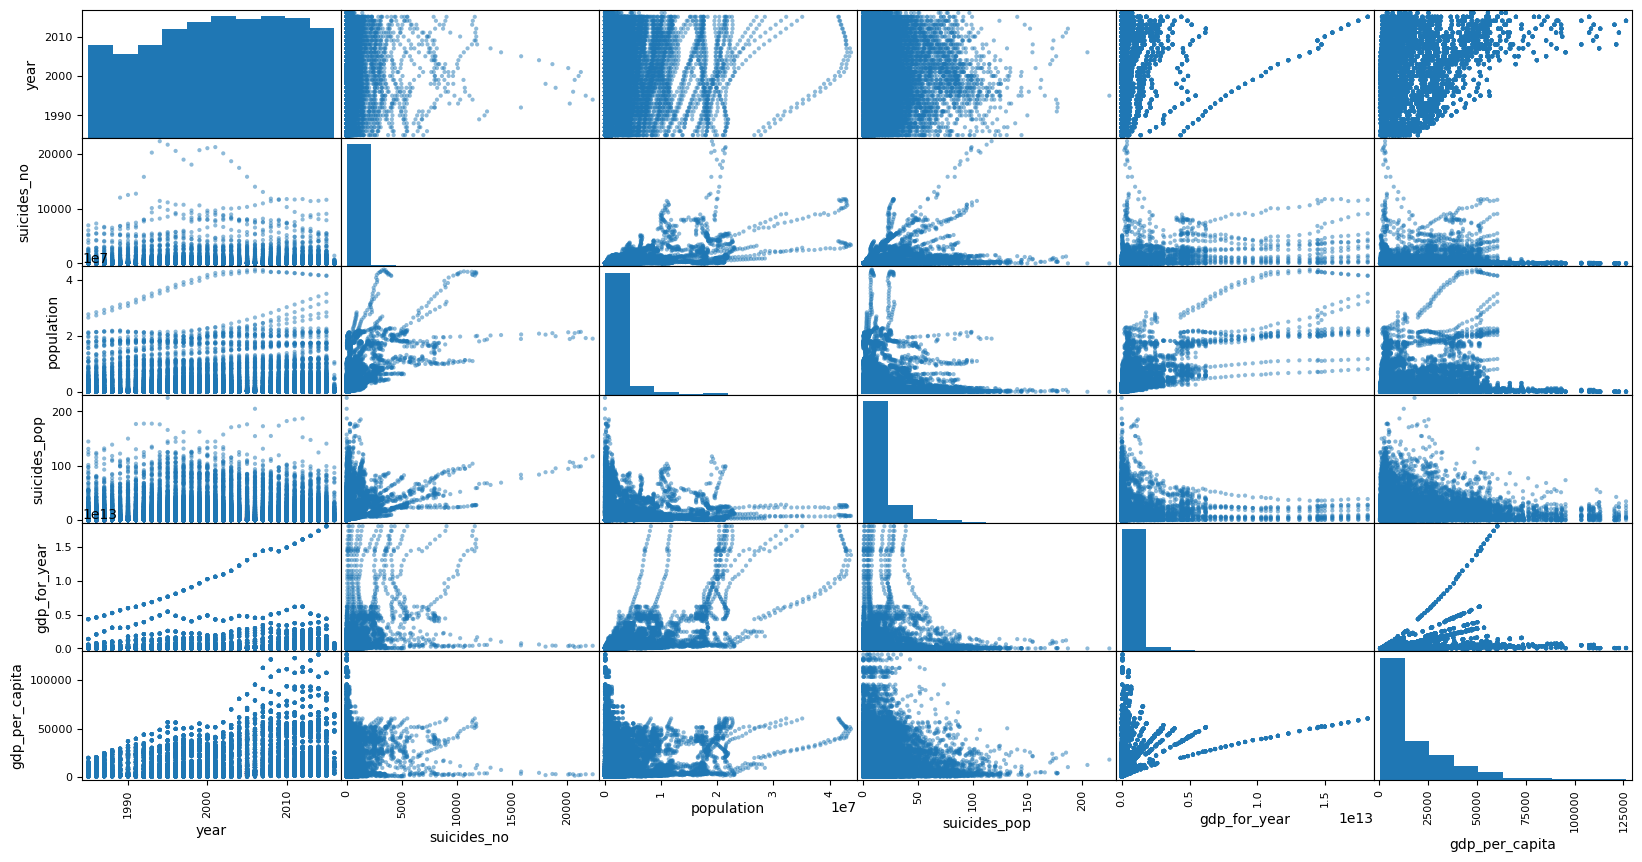

In [36]:
#Scatter matrix for checking outlier
plt.figure(figsize=(20,10))
from pandas.plotting import scatter_matrix
scatter_matrix(data[numerical], figsize=(20,10))
plt.show()

# Split les données

In [37]:
y = data['suicides_no']
X = data.drop(['suicides_no', 'suicides_pop'], axis=1)
X.shape, y.shape

((27820, 9), (27820,))

In [38]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Normalisation des données

In [40]:
from sklearn.preprocessing import StandardScaler
# Initialisez le StandardScaler
scaler_xtrain = StandardScaler()
scaler_xtest = StandardScaler()
scaler_ytrain = StandardScaler()
scaler_ytest = StandardScaler()

In [41]:
# Normalisez les ensembles d'entraînement, de test et de validation
X_train_normalized = scaler_xtrain.fit_transform(X_train)
X_test_normalized = scaler_xtest.fit_transform(X_test)

y_train_normalized = scaler_ytrain.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_ytest.fit_transform(y_test.values.reshape(-1, 1))

# Choix de modèle

Notre choix de model a été basé sur la documentation de Scikit-learn.
On fait une prédiction de quantité avec un data de taille <100K et on n'a pas beacoup de features c'est pour cela qu'on a choisit SVR(linear) et RidgeRegression. 
Si aucun des deux modèle ne donne pas des meilleurs résultats, on change le kernel de SVR à rbf.

Ridge Regression (Régression Ridge) et Support Vector Regression (SVR, Régression par Machine à Vecteurs de Support) sont deux techniques de modélisation utilisées dans la régression, une tâche d'apprentissage supervisé où l'objectif est de prédire une variable continue (par opposition à la classification qui prédit une variable catégorielle).

## Ridge Regression

In [85]:
from sklearn.linear_model import Ridge, RidgeCV
reg = Ridge(alpha=0.5)
reg.fit(X_train_normalized, y_train_normalized)

Ridge(alpha=0.5)

In [86]:
reg.score(X_test_normalized, y_test_normalized)

0.44417737767117405

In [87]:
reg.coef_

array([[-1.34116534, -0.02237465,  0.15150294,  0.04780092,  0.63210692,
         1.36304434, -0.03804709,  0.01727082, -0.03436421]])

In [88]:
reg.intercept_

array([-1.56704111e-16])

## SVR kernel = linear

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Initialisation du SVR
svr = SVR(kernel='linear')

# Appliquez le modèle sur les données d'entraînement
svr.fit(X_train_normalized, y_train_normalized)

SVR(kernel='linear')

In [47]:
svr.score(X_train_normalized, y_train_normalized)

0.3067590766263556

In [48]:
# Prédiction sur l'ensemble de test
y_pred = svr.predict(X_test_normalized)

# Évaluation de la performance
mse = mean_squared_error(y_test_normalized, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.6599295919417926


## SVR kernel = rbf

In [49]:
# Initialisation du SVR
svr_rbf = SVR(kernel='rbf')

# Appliquez le modèle sur les données d'entraînement
svr_rbf.fit(X_train_normalized, y_train_normalized)

SVR()

In [50]:
svr_rbf.score(X_train_normalized, y_train_normalized)

0.7166369899426456

In [51]:
# Prédiction sur l'ensemble de test
y_pred = svr_rbf.predict(X_test_normalized)

# Évaluation de la performance
mse = mean_squared_error(y_test_normalized, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.27525380033178265


# Feature Selection

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
results = permutation_importance(svr_rbf, X_test_normalized, y_test_normalized, scoring='neg_mean_squared_error', n_repeats=30, random_state=42)

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature %d, Score: %.5f' % (i, v))

Feature 0, Score: 0.14893
Feature 1, Score: 0.05505
Feature 2, Score: 0.25232
Feature 3, Score: 0.06299
Feature 4, Score: 0.85380
Feature 5, Score: 0.15234
Feature 6, Score: 0.23747
Feature 7, Score: 0.06669
Feature 8, Score: 0.06823


In [ ]:
# Get the indices of features sorted by importance
sorted_feature_indices = np.argsort(importance)[::-1]
# Print the corresponding columns for each feature
for i in sorted_feature_indices:
    feature_name = X_test.columns[i]
    print(f'Feature "{feature_name}", Score: {importance[i]:.5f}')

Feature "population", Score: 0.85380
Feature "sex", Score: 0.25232
Feature "gdp_for_year", Score: 0.23747
Feature "country-year", Score: 0.15234
Feature "country", Score: 0.14893
Feature "generation", Score: 0.06823
Feature "gdp_per_capita", Score: 0.06669
Feature "age", Score: 0.06299
Feature "year", Score: 0.05505


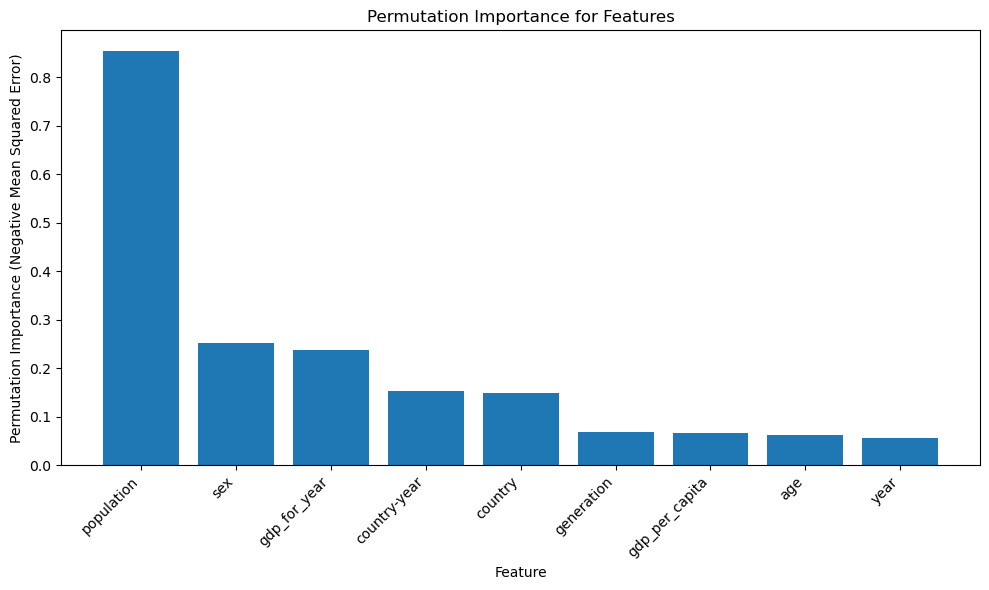

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_indices)), importance[sorted_feature_indices], align="center")
plt.xticks(range(len(sorted_feature_indices)), [X_test.columns[i] for i in sorted_feature_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Permutation Importance (Negative Mean Squared Error)")
plt.title("Permutation Importance for Features")
plt.tight_layout()
plt.show()

In [52]:
# Supposons que selected_features soit une liste des indices des caractéristiques sélectionnées
selected_features = range(0, 5)

# Création d'un nouveau jeu de données avec les caractéristiques sélectionnées
X_train_selected = X_train_normalized[:, selected_features]
X_test_selected = X_test_normalized[:, selected_features]

# Entraînement d'un nouveau modèle SVR avec les caractéristiques sélectionnées
new_svr_model = SVR(kernel='rbf')
new_svr_model.fit(X_train_selected, y_train_normalized)

SVR()

In [53]:
# Print the score of the new model on the test set
print(f"New Model Score: {new_svr_model.score(X_test_selected, y_test_normalized):.5f}")

# Évaluation du nouveau modèle sur l'ensemble de test
new_model_predictions = new_svr_model.predict(X_test_selected)
new_model_score = mean_squared_error(y_test_normalized, new_model_predictions)
print(f"Mean Squared Error of the New Model: {new_model_score:.5f}")

New Model Score: 0.71274
Mean Squared Error of the New Model: 0.28726


# Tuning avec Grid Search

In [54]:
# Définissez les valeurs des hyperparamètres à tester
param_grid = {'C': [10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}
# Créez un modèle de recherche par grille
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
# Ajustez le modèle de recherche par grille
grid.fit(X_train_selected, y_train_normalized)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.956 total time=  14.2s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.965 total time=  15.3s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.962 total time=  15.4s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.966 total time=  17.1s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.958 total time=  16.7s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.741 total time=   9.8s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.680 total time=  10.3s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.721 total time=  10.4s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.710 total time=  10.2s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.689 total time=  10.6s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.570 total time=   9.3s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=3)

In [55]:
# Affichez les meilleurs paramètres après l'optimisation
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [56]:
best_svr = grid.best_estimator_
best_svr

SVR(C=10, gamma=1)

In [57]:
best_svr.score(X_test_selected, y_test_normalized)

0.9547648892280587

In [58]:
y_pred = best_svr.predict(X_test_selected)
mse = mean_squared_error(y_test_normalized, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(f'Root Mean Squared Error on Test Set: {np.sqrt(mse)}')

Mean Squared Error on Test Set: 0.04523511077194131
Root Mean Squared Error on Test Set: 0.21268547381507114


# Cross validation 

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_train_scores = cross_val_score(best_svr, X_train_selected, y_train_normalized, cv=5, scoring='neg_mean_squared_error')
cv_val_scores = cross_val_score(best_svr, X_train_selected, y_train_normalized, cv=5, scoring='neg_mean_squared_error')

# Calculate mean scores
mean_train_score = -np.mean(cv_train_scores)
mean_val_score = -np.mean(cv_val_scores)

# Compare mean scores
print("Mean Training Score:", mean_train_score)
print("Mean Validation Score:", mean_val_score)

# Check for potential overfitting
if mean_train_score > mean_val_score:
    print("Potential Overfitting: The model may be overfitting to the training data.")
else:
    print("No Significant Overfitting Detected.")

Mean Training Score: 0.03829673725097482
Mean Validation Score: 0.03829673725097482
No Significant Overfitting Detected.


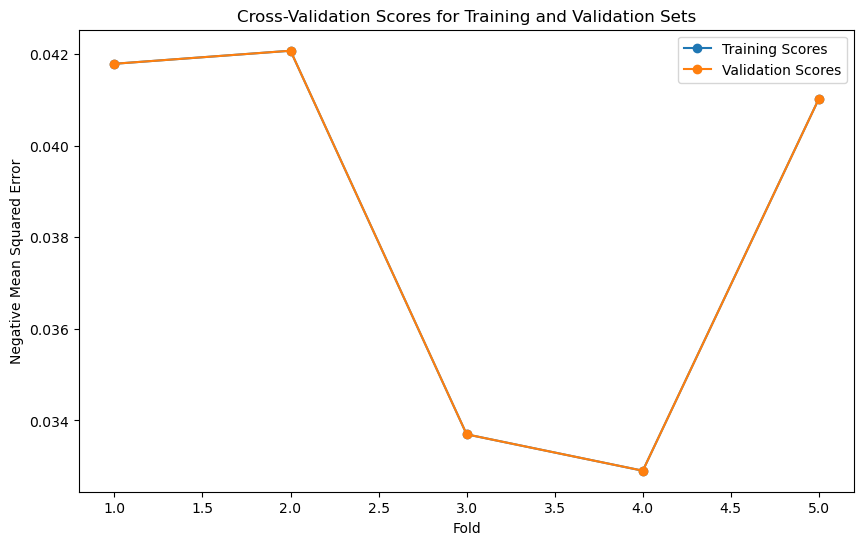

In [ ]:
# Optionally, you can visualize the scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), -cv_train_scores, marker='o', label='Training Scores')
plt.plot(range(1, 6), -cv_val_scores, marker='o', label='Validation Scores')
plt.title("Cross-Validation Scores for Training and Validation Sets")
plt.xlabel("Fold")
plt.ylabel("Negative Mean Squared Error")
plt.legend()
plt.show()

# Validation et Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

# Calculez les scores d'apprentissage et de validation
train_sizes, train_scores, val_scores = learning_curve(
    best_svr, X_train_normalized, y_train_normalized, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1, 10), verbose=3
)


[learning_curve] Training set sizes: [ 1557  3115  4673  6231  7789  9347 10905 12463 14021 15579]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................., score=(train=-0.087, test=-0.567) total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END ................., score=(train=-0.024, test=-0.317) total time=   1.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] END ................., score=(train=-0.013, test=-0.261) total time=   1.8s
[CV] END ................., score=(train=-0.013, test=-0.204) total time=   2.9s
[CV] END ................., score=(train=-0.011, test=-0.180) total time=   3.7s
[CV] END ................., score=(train=-0.011, test=-0.123) total time=   6.0s
[CV] END ................., score=(train=-0.011, test=-0.113) total time=   6.4s
[CV] END ................., score=(train=-0.010, test=-0.109) total time=   7.0s
[CV] END ................., score=(train=-0.009, test=-0.072) total time=   8.4s
[CV] END ................., score=(train=-0.009, test=-0.047) total time=  11.9s
[CV] END ................., score=(train=-0.015, test=-0.850) total time=   0.4s
[CV] END ................., score=(train=-0.037, test=-0.457) total time=   1.4s
[CV] END ................., score=(train=-0.016, test=-0.311) total time=   1.9s
[CV] END ................., score=(train=-0.012, test=-0.225) total time=   2.6s
[CV] END ................., 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


[ 1557  3115  4673  6231  7789  9347 10905 12463 14021 15579]


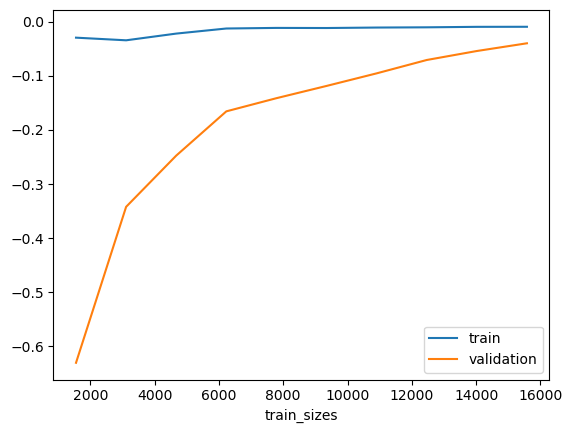

In [ ]:
print(train_sizes)
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [63]:
from sklearn.model_selection import validation_curve

# Définissez les valeurs des hyperparamètres à tester
param_range = np.logspace(-6, 0, 6)

# Calculez les scores de validation croisée pour chaque valeur de paramètre
train_scores, test_scores = validation_curve(
    best_svr, X_train_normalized, y_train_normalized, param_name="gamma", param_range=param_range, n_jobs=1
)

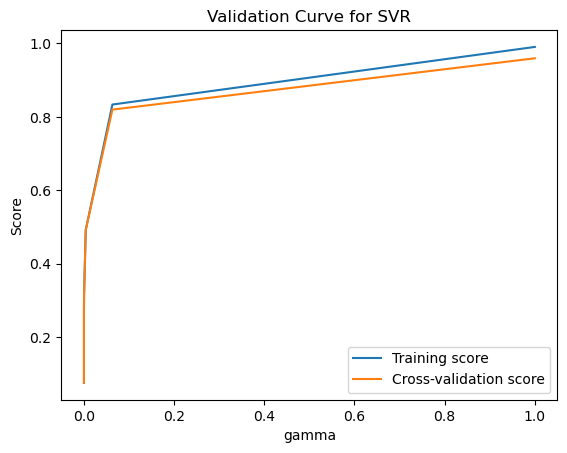

In [64]:
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVR')

plt.xlabel('gamma')
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Tester le modèle

In [107]:
X_1 = X_test[:5]
X_1

country  year  sex  age  population  country-year   gdp_for_year  \
14740       50  2011    0    2      641700          1229     6197766119   
17767       62  2011    0    2      633580          1482   168461998741   
12685       43  2007    0    5      196820          1058   178706717753   
9891        35  2005    1    4     8943091           825  2861410272354   
2349         7  2007    1    4      381400           196    33050343783   

       gdp_per_capita  generation  
14740            1273           2  
17767           41184           2  
12685           27712           5  
9891            36289           5  
2349             4172           5

In [66]:
X_new = X_test_selected[0:5]
X_new

array([[ 0.03089735,  1.14029053, -1.00456349, -0.29332439, -0.30386574],
       [ 0.43999716,  1.14029053, -1.00456349, -0.29332439, -0.305913  ],
       [-0.20774421,  0.67240141, -1.00456349,  1.47084954, -0.41603115],
       [-0.48047742,  0.43845684,  0.99545724,  0.88279156,  1.78912312],
       [-1.43504365,  0.67240141,  0.99545724,  0.88279156, -0.3694939 ]])

In [103]:
# Faire des prédictions normalisées
predictions_normalized = best_svr.predict(X_new)

# Dénormaliser les prédictions
predictions_denormalized = scaler_ytest.inverse_transform(predictions_normalized.reshape(-1, 1))


In [109]:
# Afficher les la table de test et les valeurs prédites dans un DataFrame
df = pd.DataFrame(X_1, columns=X.columns)
df['predictions'] = predictions_denormalized.astype(np.int64)
df

country  year  sex  age  population  country-year   gdp_for_year  \
14740       50  2011    0    2      641700          1229     6197766119   
17767       62  2011    0    2      633580          1482   168461998741   
12685       43  2007    0    5      196820          1058   178706717753   
9891        35  2005    1    4     8943091           825  2861410272354   
2349         7  2007    1    4      381400           196    33050343783   

       gdp_per_capita  generation  predictions  
14740            1273           2          110  
17767           41184           2           74  
12685           27712           5           21  
9891            36289           5         2240  
2349             4172           5          177